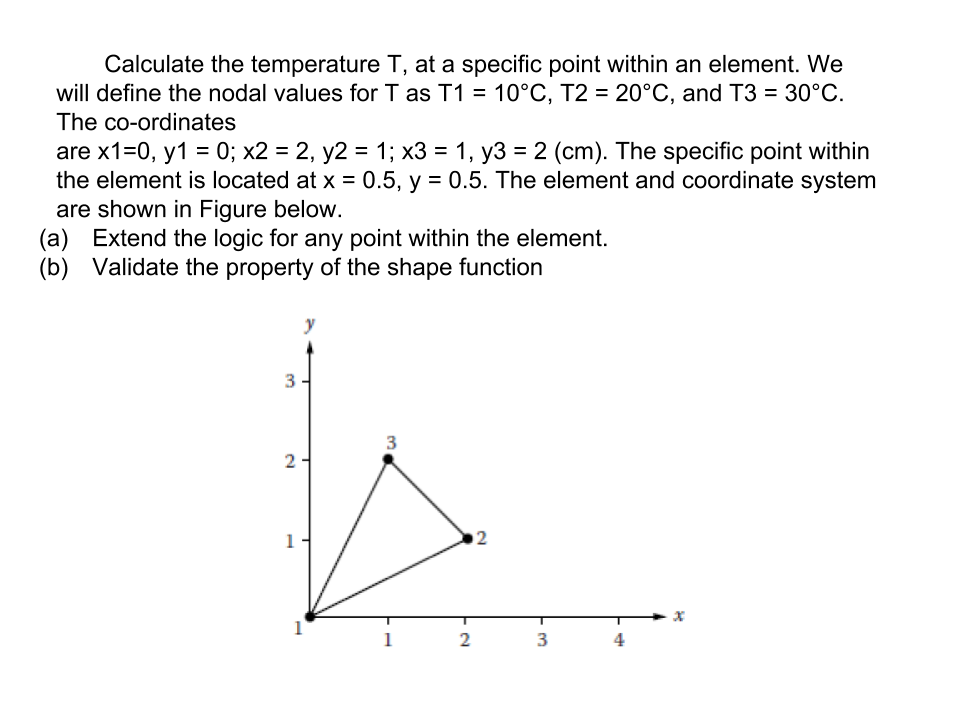

'Shape Function:'

⎡  X   Y    ⎤
⎢- ─ - ─ + 1⎥
⎢  3   3    ⎥
⎢           ⎥
⎢  2⋅X   Y  ⎥
⎢  ─── - ─  ⎥
⎢   3    3  ⎥
⎢           ⎥
⎢   X   2⋅Y ⎥
⎢ - ─ + ─── ⎥
⎣   3    3  ⎦

Sum of elements in shape function: 1.00
Sum of derivatives of x in shape function: 0
Sum of derivatives of y in shape function: 0


'Value of shape function at nodes:'

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Temperature at Specific Point will be: 15.00


In [7]:
import sympy as sp
import numpy as np
from sympy import Matrix, zeros, init_printing, symbols, diff
from IPython.display import Image
display(Image("q3.png"))
init_printing(pretty_print = True)
X,Y = symbols('X Y')

def shapeFunc(N):                  #This proves the properties of a shape function.
    display('Shape Function:', N)
    print('Sum of elements in shape function:', "%.2f" % np.sum(N))
    print('Sum of derivatives of x in shape function:', np.sum(diff(N,X)))
    print('Sum of derivatives of y in shape function:', np.sum(diff(N,Y)))
    Nc = Matrix(3, 3, lambda i,j: (N[i]*N[j]).subs({X:x[i], Y:y[i]}) if (N[i]*N[j]).subs({X:x[j], Y:y[j]}) > 0.00001 else 0)
    display('Value of shape function at nodes:', Nc)

def tri(x,y, spec, T):              #This is a function that should help in future generalizations
    a,b,c,N=  [zeros(3,1) for i in range(4)]
    A = Matrix([[1,1,1], x, y]).det() / 2
    for i in range(3):              #This loop automatically makes all the values, which can scale over to different codes.
        a[i] = (x[(i+1)%3]*y[(i+2)%3] - x[(i+2)%3]*y[(i+1)%3])
        b[i] = (y[(i+1)%3] - y[(i+2)%3])                    #So that I don't forget, the modulus function 
        c[i] = (x[(i+2)%3] - x[(i+1)%3])                    #here will allow cycling through i,j & k.
        N[i] = ((a[i] + b[i]*X + c[i]*Y) / (2*A))
    shapeFunc(N)
    return (N.T*Matrix(T)).subs(spec)[0]

x = [0,2,1]
y = [0,1,2]                     #Just change these values to change the shape of the triangle.
T = [10,20,30]

spec = {X: 0.5, Y: 0.5}         #Just change this value to move specific point.

print('Temperature at Specific Point will be:',"%.2f" % tri(x,y, spec, T))